In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import sys
sys.path.append('..')
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

data = np.genfromtxt(fname = '132234-svm.txt', dtype='str')

X = data[1:,:-2].astype(np.float)
y = data[1:,-1].astype(np.float)
header = data[0]

In [2]:
unique, counts = np.unique(y, return_counts=True)

print(unique[0],counts[0]/np.sum(counts))
print(unique[1],counts[1]/np.sum(counts))

0.0 0.2598
1.0 0.7402


In [4]:
clf = DummyClassifier(strategy="most_frequent")

score = cross_val_score(clf, X, y, scoring='balanced_accuracy')
print(score)
score = cross_val_score(clf, X, y, scoring='accuracy')
print(score)

print(len(X))

[0.5 0.5 0.5 0.5 0.5]
[0.7403 0.7403 0.7403 0.74   0.74  ]
15000


In [5]:
mean_=[]
max_=[]
min_=[]

histogram=[]

for i in range(len(X[0])-1):
    print(header[i],np.mean(X[i,:]),np.max((X[i,:])),np.min((X[i,:])))
    
for i in range(len(X[0])-1):
    print(header[i],np.histogram(X[i,:]))  

dissim 1.334701295762712 51.051 -0.70359
el0 1.609851400847458 40.951 -0.6877
el1 1.4130371313559322 31.579 -0.70094
el2 2.1406752915254237 56.777 -0.70644
el3 2.3429827161016945 64.752 -0.70547
el4 1.7299861237288137 30.875 -0.69517
el5 1.7425546169491526 54.963 -0.7067
el6 1.8191499525423729 49.778 -0.65075
el7 2.3072217807627116 49.621 -0.70559
el8 2.0387670305084744 60.842 -0.70346
el9 1.333844993220339 27.152 -0.70693
el10 2.87239938559322 105.58 -0.68472
el11 1.529822586440678 60.925 -0.70401
el12 4.374551962711866 166.29 -0.70707
el13 2.0571968655932205 53.959 -0.70711
el14 1.3120730845762714 28.215 -0.70708
el15 1.8370203822033897 37.445 -0.70302
el16 1.2147374254237289 34.297 -0.6621
el17 1.3139698068644068 33.816 -0.70368
el18 1.3988715466101695 33.673 -0.70503
el19 2.207846413559322 61.164 -0.69689
el20 0.9401813406779661 17.935 -0.53486
el21 0.8355284720338984 15.256 -0.7069
el22 2.1602055432203393 75.415 -0.70261
el23 10.152414087288138 395.82 -1.1235
el24 11.1690303889830

15000


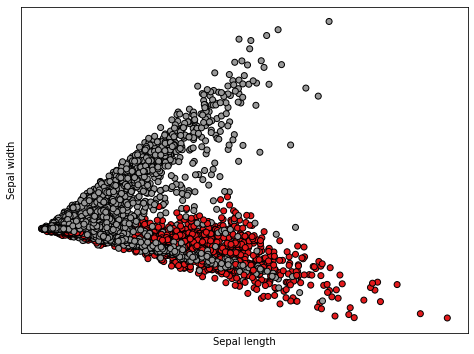

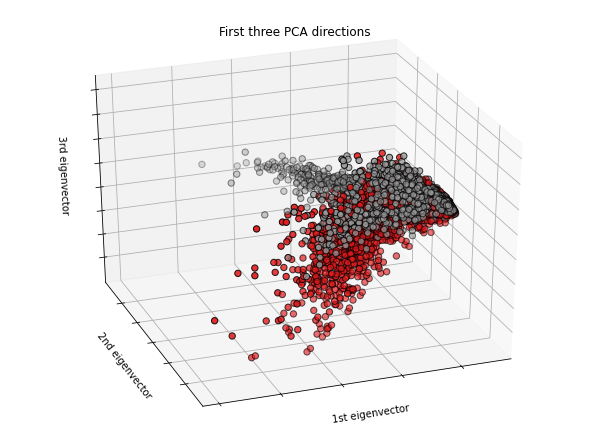

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_X = pca.fit_transform(X_scaled)
print(len(pca_X))

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [7]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score


skf = StratifiedKFold(n_splits=10)
svc = svm.SVC()


In [8]:
scoring_methods = {'acc' : 'accuracy',
                  'b_acc' : 'balanced_accuracy',
                  'g_mean' : make_scorer(geometric_mean_score)}

param_grid = [
  {'C': [0.1,1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001], 'kernel': ['sigmoid',]},
 ]

clf_sigmoid = GridSearchCV(svc,param_grid, scoring=scoring_methods, cv = skf, n_jobs=-1, verbose=10, refit = False)
clf_sigmoid.fit(X, y)

pickle.dump(clf_sigmoid.cv_results_, open("sigmoid", "wb"))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 29

In [18]:
from sklearn.pipeline import Pipeline

scoring_methods = {'acc' : 'accuracy',
                  'b_acc' : 'balanced_accuracy',
                  'g_mean' : make_scorer(geometric_mean_score)}

skf = StratifiedKFold(n_splits=10)
scaler = StandardScaler()

pipe = Pipeline([('transformer', StandardScaler()), ('SVC', svc)])

param_grid = [{
      'SVC__C': [0.1,1,10,100,1000,10000],
      'SVC__gamma': [1,0.1,0.01,0.001,0.0001,0.00001],
      'SVC__kernel': ['sigmoid']
}]

clf_sigmoid_transformed = GridSearchCV(pipe,
                    param_grid=param_grid,
                    scoring=scoring_methods,
                    cv=skf,
                    refit=False,
                    n_jobs=-1,
                    verbose=10)
clf_sigmoid_transformed.fit(X, y)

pickle.dump(clf_sigmoid_transformed.cv_results_, open("sigmoid_transformed", "wb"))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 56

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

scoring_methods = {'acc' : 'accuracy',
                  'b_acc' : 'balanced_accuracy',
                  'g_mean' : make_scorer(geometric_mean_score)}

skf = StratifiedKFold(n_splits=10)

pipe = Pipeline([('transformer', Normalizer()), ('SVC', svc)])

param_grid = [{
      'SVC__C': [0.1,1,10,100,1000,10000],
      'SVC__gamma': [1,0.1,0.01,0.001,0.0001,0.00001],
      'SVC__kernel': ['sigmoid']
}]

clf_sigmoid_normalized = GridSearchCV(pipe,
                    param_grid=param_grid,
                    scoring=scoring_methods,
                    cv=skf,
                    refit=False,
                    n_jobs=-1,
                    verbose=10)
clf_sigmoid_normalized.fit(X, y)

pickle.dump(clf_sigmoid_normalized.cv_results_, open("sigmoid_normalized", "wb"))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 94.9min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 106.0min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 118.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 137.3min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 156.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed

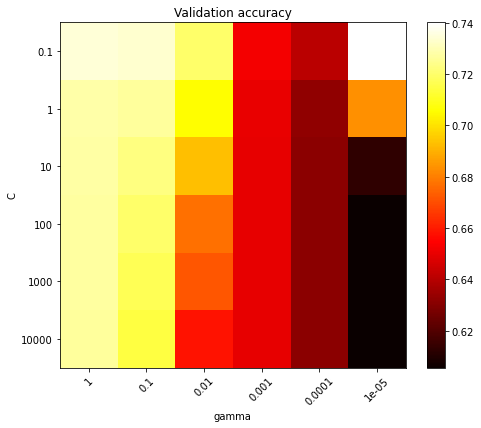

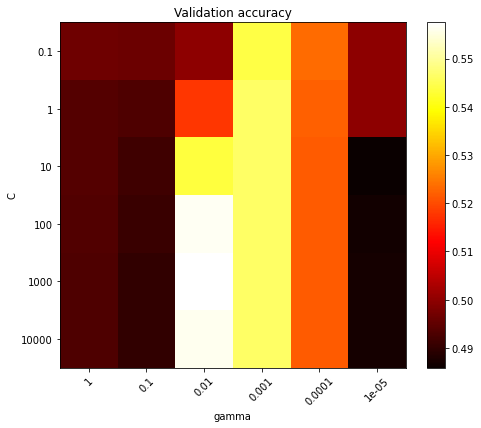

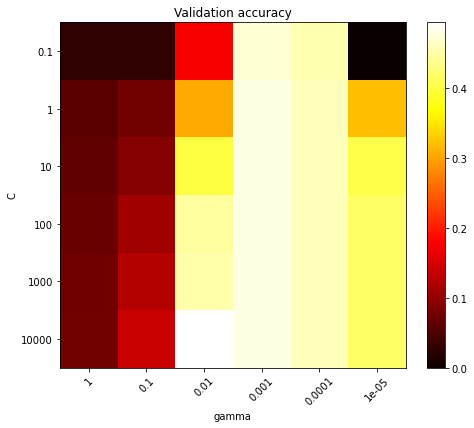

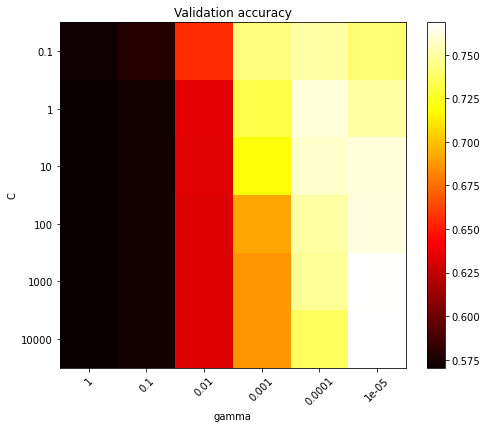

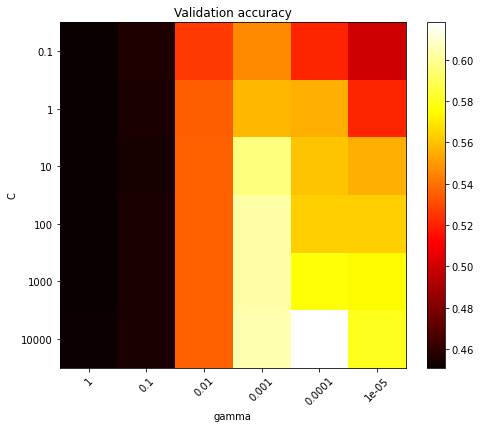

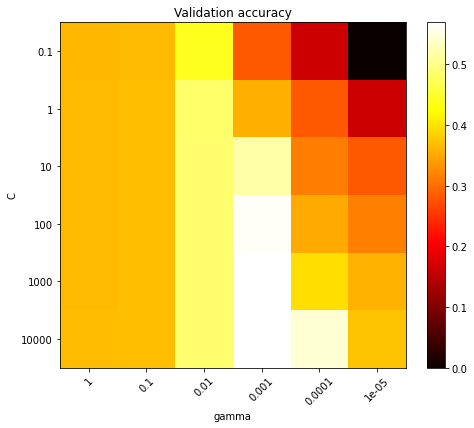

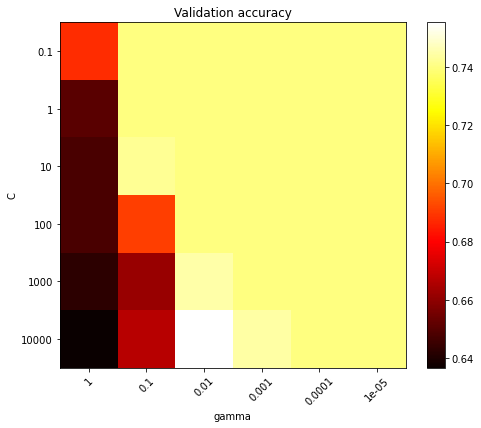

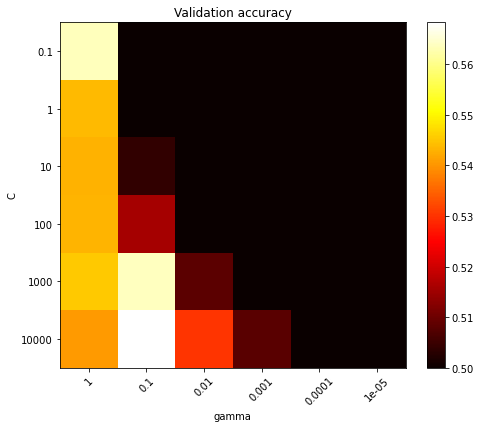

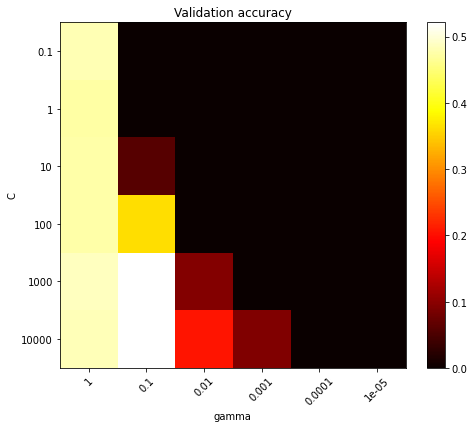

In [23]:
def heatmapper(scores,C_range,gamma_range):
    scores = scores.reshape(len(C_range),len(gamma_range))
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.title('Validation accuracy')
    plt.show()

heatmapper(clf_sigmoid.cv_results_['mean_test_acc'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])
heatmapper(clf_sigmoid.cv_results_['mean_test_b_acc'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])
heatmapper(clf_sigmoid.cv_results_['mean_test_g_mean'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])

heatmapper(clf_sigmoid_transformed.cv_results_['mean_test_acc'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])
heatmapper(clf_sigmoid_transformed.cv_results_['mean_test_b_acc'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])
heatmapper(clf_sigmoid_transformed.cv_results_['mean_test_g_mean'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])

heatmapper(clf_sigmoid_normalized.cv_results_['mean_test_acc'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])
heatmapper(clf_sigmoid_normalized.cv_results_['mean_test_b_acc'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])
heatmapper(clf_sigmoid_normalized.cv_results_['mean_test_g_mean'], [0.1,1,10,100,1000,10000], [1,0.1,0.01,0.001,0.0001,0.00001])

[0.7403 0.7489 0.7519 0.7451 0.7386 0.7063 0.7573 0.7482 0.7386 0.6767
 0.7649 0.7613]
[0.5007 0.5393 0.5342 0.516  0.5033 0.5559 0.5492 0.5241 0.5033 0.5573
 0.5777 0.5516]
[0.0316 0.267  0.231  0.162  0.1046 0.4485 0.2827 0.1967 0.1046 0.4927
 0.3707 0.2743]


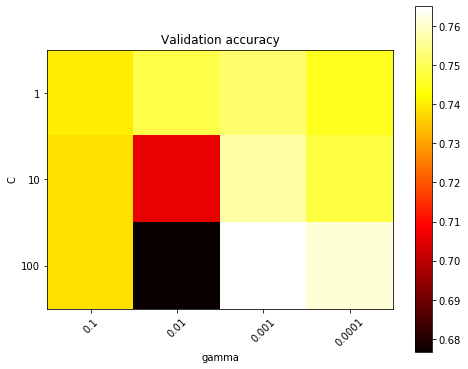

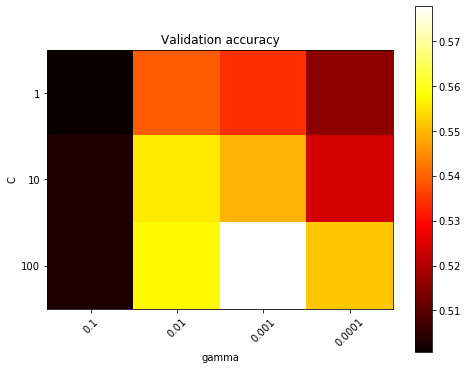

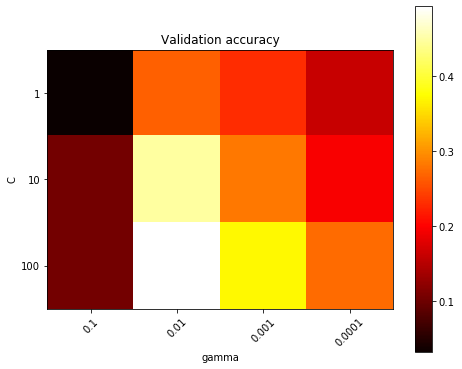

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
